In [24]:
import pandas as pd
import sklearn.ensemble
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data=pd.read_csv("energydata_complete.csv")
data['date']=data['date'].apply(lambda dt: datetime.strptime(dt,"%Y-%m-%d %H:%M:%S"))

In [98]:
data['timeofday']=pd.Series([i.hour*60+i.minute for i in data['date']])
data['weekday']=pd.Series([i.weekday() for i in data['date']])
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,timeofday,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1020,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1030,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1040,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1050,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1060,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,1070,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,1080,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,1090,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,1100,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,1110,0


In [99]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,timeofday,weekday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,715.118824,2.977249
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,415.667014,1.985617
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,360.000000,1.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,720.000000,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,1070.000000,5.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1430.000000,6.000000


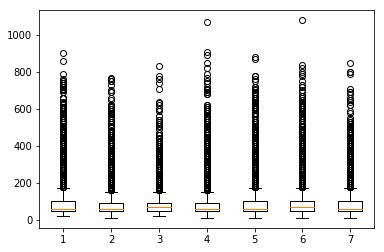

In [101]:
dayofweekdata=[]
for h in range(7):
    dayofweekdata.append(data.loc[data.loc[:,'weekday']==h].loc[:,'Appliances'].reset_index(drop=True))
plt.figure()
plt.boxplot(dayofweekdata)
plt.show()

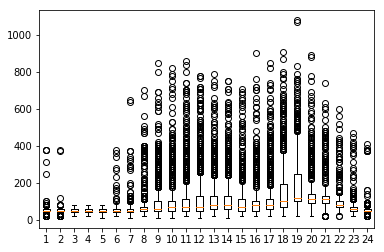

In [102]:
hourdata=[]
for h in range(24):
    hourdata.append(data.loc[(data.loc[:,'timeofday']>=60*h) & (data.loc[:,'timeofday']<60*(h+1))].loc[:,'Appliances'].reset_index(drop=True))
plt.figure()
plt.boxplot(hourdata)
plt.show()

In [125]:
data_shuffle=data.sample(frac=1).reset_index(drop=True)

In [104]:
feature=list(data.columns)
feature.remove('rv1')
feature.remove('rv2')
feature.remove('date')
feature.remove('Appliances')
feature

['lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'timeofday',
 'weekday']

In [126]:
xtrain=data_shuffle.loc[:13800,feature]
ytrain=data_shuffle.loc[:13800,'Appliances']
xtest=data_shuffle.loc[13801:,feature]
ytest=data_shuffle.loc[13801:,'Appliances']

In [106]:
lm=sklearn.linear_model.Ridge()
lm.fit(xtrain,ytrain)
lm.score(xtest,ytest)

0.1630043279740041

In [107]:
yhat=lm.predict(xtest)
np.mean(np.power(yhat-ytest,2))

8734.053705911698

In [108]:
N_ran=range(100,300,10)
feature_ran=[5,10,15]
testscore=[[0 for i in range(len(N_ran))]for j in range(len(feature_ran))]
testmse=[[0 for i in range(len(N_ran))] for j in range(len(feature_ran))]
for N in range(len(N_ran)):
    for f in range(len(feature_ran)):
        gb=sklearn.ensemble.GradientBoostingRegressor(learning_rate=0.5,n_estimators=N_ran[N],max_features=feature_ran[f],max_leaf_nodes=15)
        gb.fit(xtrain,ytrain)
        testscore[f][N]=gb.score(xtest,ytest)
        testmse[f][N]=gb.loss_(ytest,gb.predict(xtest))

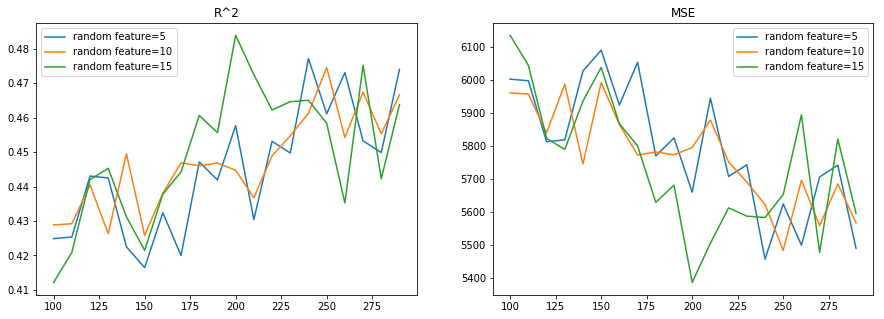

In [109]:
plt.figure()
f,plots=plt.subplots(1,2,figsize=(15,5))
p1,=plots[0].plot(N_ran,testscore[0])
p2,=plots[0].plot(N_ran,testscore[1])
p3,=plots[0].plot(N_ran,testscore[2])
plots[0].legend([p1,p2,p3],["random feature={}".format(feature_ran[0]),"random feature={}".format(feature_ran[1]),"random feature={}".format(feature_ran[2])])
plots[0].set_title('R^2')
p1,=plots[1].plot(N_ran,testmse[0])
p2,=plots[1].plot(N_ran,testmse[1])
p3,=plots[1].plot(N_ran,testmse[2])
plots[1].legend([p1,p2,p3],["random feature={}".format(feature_ran[0]),"random feature={}".format(feature_ran[1]),"random feature={}".format(feature_ran[2])])
plots[1].set_title('MSE')
plt.show()

In [138]:
N_ran=range(100,300,10)
leaf_node_ran=[5,15,25]
testscore=[[0 for i in range(len(N_ran))] for j in range(len(leaf_node_ran))]
testmse=[[0 for i in range(len(N_ran))] for j in range(len(leaf_node_ran))]
for N in range(len(N_ran)):
    for ln in range(len(leaf_node_ran)):
        gb=sklearn.ensemble.GradientBoostingRegressor(learning_rate=0.5,n_estimators=N_ran[N],max_features=5,max_leaf_nodes=leaf_node_ran[ln])
        gb.fit(xtrain,ytrain)
        testscore[ln][N]=gb.score(xtest,ytest)
        testmse[ln][N]=gb.loss_(ytest,gb.predict(xtest))

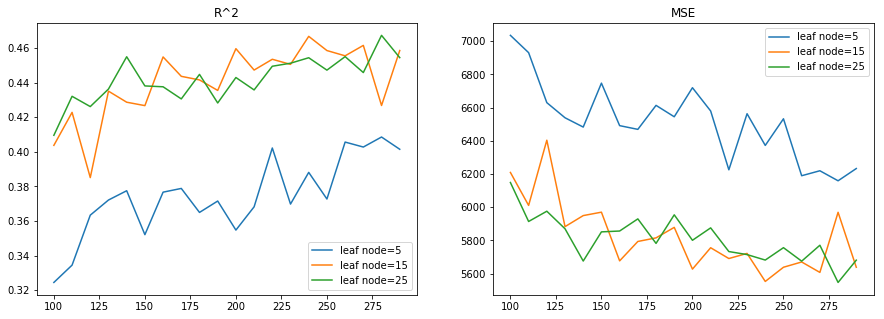

In [139]:
plt.figure()
f,plots=plt.subplots(1,2,figsize=(15,5))
p1,=plots[0].plot(N_ran,testscore[0])
p2,=plots[0].plot(N_ran,testscore[1])
p3,=plots[0].plot(N_ran,testscore[2])
plots[0].legend([p1,p2,p3],["leaf node={}".format(leaf_node_ran[0]),"leaf node={}".format(leaf_node_ran[1]),"leaf node={}".format(leaf_node_ran[2])])
plots[0].set_title('R^2')
p1,=plots[1].plot(N_ran,testmse[0])
p2,=plots[1].plot(N_ran,testmse[1])
p3,=plots[1].plot(N_ran,testmse[2])
plots[1].legend([p1,p2,p3],["leaf node={}".format(leaf_node_ran[0]),"leaf node={}".format(leaf_node_ran[1]),"leaf node={}".format(leaf_node_ran[2])])
plots[1].set_title('MSE')
plt.show()

In [10]:
N_ran=range(100,300,10)
sk=[0.1,0.5,1]
testscore=[[0 for i in range(len(N_ran))]for j in range(len(sk))]
testmse=[[0 for i in range(len(N_ran))] for j in range(len(sk))]
trainscore=[[0 for i in range(len(N_ran))]for j in range(len(sk))]
trainmse=[[0 for i in range(len(N_ran))] for j in range(len(sk))]
for N in range(len(N_ran)):
    for s in range(len(sk)):
        gb=sklearn.ensemble.GradientBoostingRegressor(learning_rate=sk[s],n_estimators=N_ran[N],max_features=10,max_leaf_nodes=15)
        gb.fit(xtrain,ytrain)
        testscore[s][N]=gb.score(xtest,ytest)
        testmse[s][N]=gb.loss_(ytest,gb.predict(xtest))
        trainscore[s][N]=gb.score(xtrain,ytrain)
        trainmse[s][N]=gb.loss_(ytrain,gb.predict(xtrain))

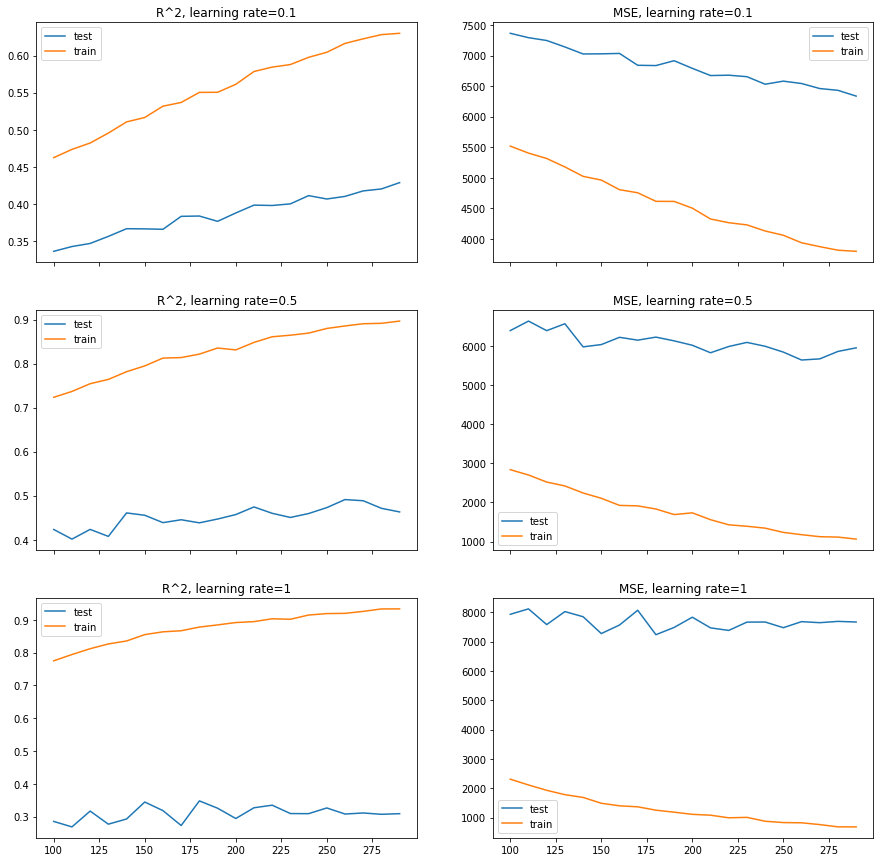

In [11]:
plt.figure()
f,plots=plt.subplots(3,2,sharex=True,figsize=(15,15))
for s in range(len(sk)):
    p1,=plots[s,0].plot(N_ran,testscore[s])
    p2,=plots[s,0].plot(N_ran,trainscore[s])
    plots[s,0].legend([p1,p2],["test","train"])
    plots[s,0].set_title("R^2, learning rate={}".format(sk[s]))
    p1,=plots[s,1].plot(N_ran,testmse[s])
    p2,=plots[s,1].plot(N_ran,trainmse[s])
    plots[s,1].legend([p1,p2],["test","train"])
    plots[s,1].set_title("MSE, learning rate={}".format(sk[s]))
plt.show()

In [41]:
gb=sklearn.ensemble.GradientBoostingRegressor(n_estimators=300,max_features=5,max_leaf_nodes=15,learning_rate=0.5)
gb.fit(xtrain,ytrain)
gb.feature_importances_

array([ 0.01684596,  0.03034153,  0.04520871,  0.03779354,  0.0476793 ,
        0.04916497,  0.04269255,  0.03714225,  0.04513748,  0.02990659,
        0.03803638,  0.04378982,  0.04382188,  0.0328716 ,  0.03968853,
        0.0387964 ,  0.05560484,  0.03343791,  0.04037561,  0.03762916,
        0.05108473,  0.02948003,  0.0243749 ,  0.02177675,  0.04234323,
        0.04307074,  0.00190464])

In [136]:
N_ran=range(1,50)
feature_ran=[5,15,20]
testscore=[[0 for i in range(len(N_ran))]for j in range(len(feature_ran))]
testmse=[[0 for i in range(len(N_ran))] for j in range(len(feature_ran))]
for N in range(len(N_ran)):
    for f in range(len(feature_ran)):
        rf=sklearn.ensemble.RandomForestRegressor(n_estimators=N_ran[N],max_features=feature_ran[f],max_leaf_nodes=20)
        rf.fit(xtrain,ytrain)
        testscore[f][N]=rf.score(xtest,ytest)
        yhat=rf.predict(xtest)
        testmse[f][N]=np.mean(np.power(yhat-ytest,2))

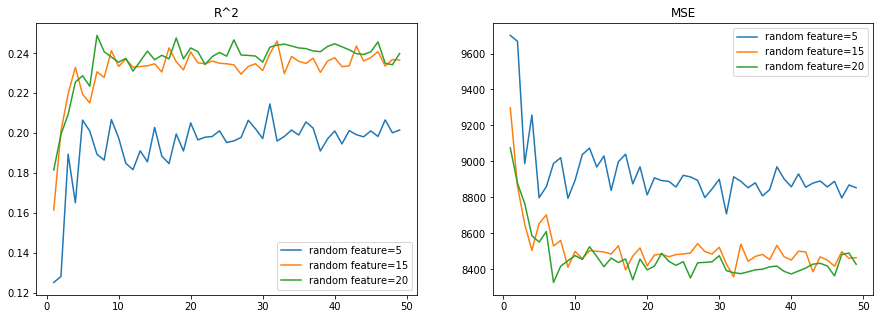

In [30]:
plt.figure()
f,plots=plt.subplots(1,2,figsize=(15,5))
p1,=plots[0].plot(N_ran,testscore[0])
p2,=plots[0].plot(N_ran,testscore[1])
p3,=plots[0].plot(N_ran,testscore[2])
plots[0].legend([p1,p2,p3],["random feature={}".format(feature_ran[0]),"random feature={}".format(feature_ran[1]),"random feature={}".format(feature_ran[2])])
plots[0].set_title('R^2')
p1,=plots[1].plot(N_ran,testmse[0])
p2,=plots[1].plot(N_ran,testmse[1])
p3,=plots[1].plot(N_ran,testmse[2])
plots[1].legend([p1,p2,p3],["random feature={}".format(feature_ran[0]),"random feature={}".format(feature_ran[1]),"random feature={}".format(feature_ran[2])])
plots[1].set_title('MSE')
plt.show()

In [37]:
N_ran=range(1,50)
leaf_node_ran=[50,70,80]
testscore=[[0 for i in range(len(N_ran))] for j in range(len(leaf_node_ran))]
testmse=[[0 for i in range(len(N_ran))] for j in range(len(leaf_node_ran))]
for N in range(len(N_ran)):
    for ln in range(len(leaf_node_ran)):
        rf=sklearn.ensemble.RandomForestRegressor(n_estimators=N_ran[N],max_features=15,max_leaf_nodes=leaf_node_ran[ln])
        rf.fit(xtrain,ytrain)
        testscore[ln][N]=rf.score(xtest,ytest)
        yhat=rf.predict(xtest)
        testmse[ln][N]=np.mean(np.power(yhat-ytest,2))

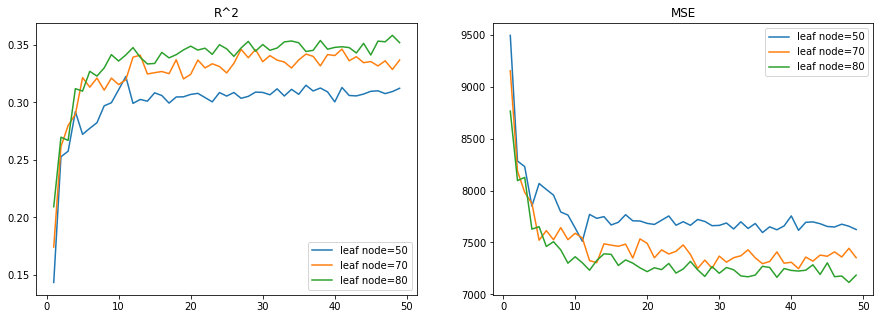

In [65]:
plt.figure()
f,plots=plt.subplots(1,2,figsize=(15,5))
p1,=plots[0].plot(N_ran,testscore[0])
p2,=plots[0].plot(N_ran,testscore[1])
p3,=plots[0].plot(N_ran,testscore[2])
plots[0].legend([p1,p2,p3],["leaf node={}".format(leaf_node_ran[0]),"leaf node={}".format(leaf_node_ran[1]),"leaf node={}".format(leaf_node_ran[2])])
plots[0].set_title('R^2')
p1,=plots[1].plot(N_ran,testmse[0])
p2,=plots[1].plot(N_ran,testmse[1])
p3,=plots[1].plot(N_ran,testmse[2])
plots[1].legend([p1,p2,p3],["leaf node={}".format(leaf_node_ran[0]),"leaf node={}".format(leaf_node_ran[1]),"leaf node={}".format(leaf_node_ran[2])])
plots[1].set_title('MSE')
plt.show()

In [127]:
rf=sklearn.ensemble.RandomForestRegressor(n_estimators=30,max_features=15,max_leaf_nodes=70)
rf.fit(xtrain,ytrain)
rf.feature_importances_

array([ 0.05170299,  0.01899845,  0.03254618,  0.02728338,  0.02618208,
        0.05754148,  0.04068169,  0.02375966,  0.02486071,  0.02513291,
        0.02242585,  0.02302244,  0.02642126,  0.0334334 ,  0.03192997,
        0.03733501,  0.02186381,  0.03301938,  0.01802988,  0.02143114,
        0.02968576,  0.02404879,  0.02700757,  0.01069585,  0.02063661,
        0.28001811,  0.01030565])

In [134]:
rf.score(xtest,ytest)

0.34006072716872726

In [135]:
gb.score(xtest,ytest)

0.46114769536168543

In [128]:
gb=sklearn.ensemble.GradientBoostingRegressor(n_estimators=300,max_features=15,max_leaf_nodes=15,learning_rate=0.5)
gb.fit(xtrain,ytrain)
gb.feature_importances_

array([ 0.01218986,  0.03209767,  0.04616652,  0.03495533,  0.05300181,
        0.05379047,  0.03791095,  0.03163591,  0.04267414,  0.02912417,
        0.04690838,  0.04214087,  0.04438198,  0.03437203,  0.04724383,
        0.04213702,  0.04559665,  0.02027431,  0.04560733,  0.03332485,
        0.05222042,  0.03617753,  0.02228425,  0.02986193,  0.03347573,
        0.04172951,  0.00871656])

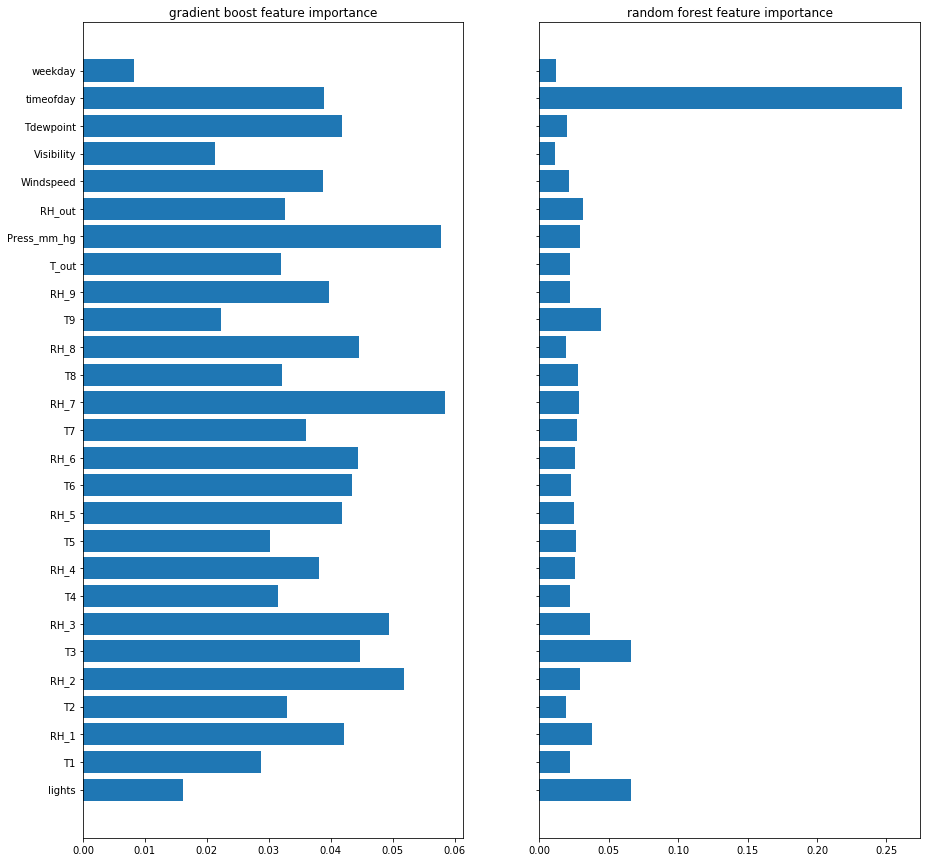

In [114]:
plt.figure()
f,plots=plt.subplots(1,2,figsize=(15,15),sharey=True)
plots[0].barh(np.arange(len(feature)),gb.feature_importances_)
plots[0].set_title('gradient boost feature importance')
plots[1].barh(np.arange(len(feature)),rf.feature_importances_)
plots[1].set_title('random forest feature importance')
plt.yticks(np.arange(len(feature)),feature)
plt.show()

In [129]:
yhat_gb=gb.predict(xtest)
res_gb=yhat_gb-ytest
yhat_rf=rf.predict(xtest)
res_rf=yhat_rf-ytest

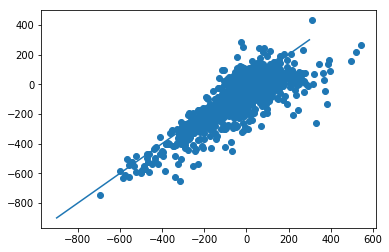

In [130]:
plt.figure()
plt.scatter(res_gb,res_rf)
plt.plot(range(-900,300),range(-900,300))
plt.show()

In [131]:
np.mean(np.power(yhat_gb-ytest,2))

5840.494967535174

In [132]:
np.mean(np.power(yhat_rf-ytest,2))

7152.928490186129

In [133]:
[np.mean(np.power((yhat_rf*x/50+yhat_gb*(2-x/50))/2-ytest,2)) for x in range(101)]

[5840.494967535174,
 5823.6765644475645,
 5807.463065164234,
 5791.854469685248,
 5776.850778010604,
 5762.451990140258,
 5748.658106074253,
 5735.469125812605,
 5722.885049355255,
 5710.905876702201,
 5699.531607853522,
 5688.762242809145,
 5678.597781569087,
 5669.038224133373,
 5660.08357050197,
 5651.73382067493,
 5643.988974652168,
 5636.849032433764,
 5630.3139940196525,
 5624.38385940988,
 5619.058628604492,
 5614.33830160335,
 5610.22287840658,
 5606.712359014104,
 5603.806743425958,
 5601.506031642178,
 5599.810223662659,
 5598.719319487544,
 5598.233319116711,
 5598.352222550215,
 5599.076029788008,
 5600.404740830167,
 5602.338355676645,
 5604.876874327452,
 5608.020296782574,
 5611.768623042036,
 5616.121853105827,
 5621.079986973901,
 5626.643024646367,
 5632.810966123137,
 5639.583811404208,
 5646.961560489599,
 5654.944213379343,
 5663.531770073424,
 5672.724230571826,
 5682.521594874544,
 5692.923862981541,
 5703.931034892939,
 5715.543110608613,
 5727.760090128649,
 57